In [41]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

#read in who_life_exp.csv
df = pd.read_csv('who_life_exp.csv')
df.head()

,country,country_code,region,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,...,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_poverty,une_edu_spend,une_literacy,une_school
0,Angola,AGO,Africa,2000,47.33730,14.73400,383.5583,0.137985,0.025695,1.47439,...,1.90860,16395.473,122.2,46.522,1.0,2530.0,32.3,2.60753,NaN,NaN
1,Angola,AGO,Africa,2001,48.19789,14.95963,372.3876,0.133675,0.024500,1.94025,...,4.48352,16945.753,118.9,47.059,1.1,2630.0,NaN,NaN,67.40542,NaN
2,Angola,AGO,Africa,2002,49.42569,15.20010,354.5147,0.128320,0.023260,2.07512,...,3.32946,17519.417,115.1,47.702,1.2,3180.0,NaN,NaN,NaN,NaN
3,Angola,AGO,Africa,2003,50.50266,15.39144,343.2169,0.122040,0.021925,2.20275,...,3.54797,18121.479,110.8,48.440,1.3,3260.0,NaN,NaN,NaN,NaN
4,Angola,AGO,Africa,2004,51.52863,15.56860,333.8711,0.115700,0.020545,2.41274,...,3.96720,18758.145,106.2,49.263,1.3,3560.0,NaN,NaN,NaN,NaN


#Create profile for EDA, optional
profile = ProfileReport(df, title='Pandas Profiling Report', minimal=True, correlations={"pearson": {"calculate": True}})
profile.to_file("life_exp_eda.html")

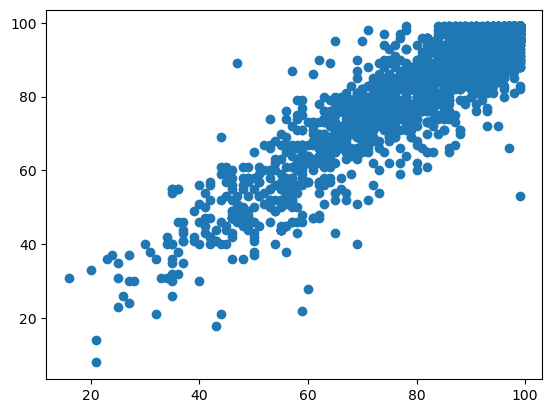

In [42]:
plt.scatter(df['measles'],df['polio'])

### Feature removal and decorrelation

In [43]:
#Based on EDA, the following features are basically the same thing as life expectancy and should be removed
bad_features = ['une_infant', 'une_life', 'country_code']
df = df.drop(columns=bad_features)

#The following features are highly correlated with the target. We may consider trying models with or without these features
highly_correlated_features = ['adult_mortality', 'infant_mort']

#The columns 'diptheria', 'polio', and 'measles' are essentially measuring the same thing and will be averaged under a new column 'diseases'
df['diseases'] = (df['diphtheria'] + df['polio'] + df['measles']) / 3

#The features 'une_gni' and 'gni_capita' are virtually the same feature and the latter will be removed.
df = df.drop(columns=['gni_capita'])

### One-hot-encoding of categorial feature 'region'

In [44]:
df = pd.get_dummies(df, columns=['region'])

In [45]:
df

,country,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,bmi,age5-19thinness,...,une_edu_spend,une_literacy,une_school,diseases,region_Africa,region_Americas,region_Eastern Mediterranean,region_Europe,region_South-East Asia,region_Western Pacific
0,Angola,2000,47.33730,14.73400,383.5583,0.137985,0.025695,1.47439,21.7,11.0,...,2.60753,NaN,NaN,28.000000,1,0,0,0,0,0
1,Angola,2001,48.19789,14.95963,372.3876,0.133675,0.024500,1.94025,21.8,10.9,...,NaN,67.40542,NaN,43.333333,1,0,0,0,0,0
2,Angola,2002,49.42569,15.20010,354.5147,0.128320,0.023260,2.07512,21.9,10.7,...,NaN,NaN,NaN,42.666667,1,0,0,0,0,0
3,Angola,2003,50.50266,15.39144,343.2169,0.122040,0.021925,2.20275,22.0,10.5,...,NaN,NaN,NaN,37.000000,1,0,0,0,0,0
4,Angola,2004,51.52863,15.56860,333.8711,0.115700,0.020545,2.41274,22.2,10.3,...,NaN,NaN,NaN,36.000000,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3106,Lao People's Democratic Republic,2012,64.49448,16.57977,209.2666,0.055840,0.004845,6.29833,22.4,9.2,...,1.82147,NaN,NaN,76.333333,0,0,0,0,0,1
3107,Lao People's Democratic Republic,2013,64.79716,16.64219,205.1459,0.055350,0.004600,6.42186,22.6,9.1,...,3.23381,NaN,NaN,85.000000,0,0,0,0,0,1
3108,Lao People's Democratic Republic,2014,65.10757,16.70787,200.8204,0.054585,0.004405,6.64447,22.7,9.0,...,2.93781,NaN,NaN,87.666667,0,0,0,0,0,1
3109,Lao People's Democratic Republic,2015,65.45008,16.77074,196.6613,0.053465,0.004160,6.83826,22.8,8.9,...,NaN,84.66104,NaN,81.333333,0,0,0,0,0,1


### Missing value imputation
For the purpose of this analysis we care about modeling a single year for every country. This is because if we include multiple years of the same country as observations, the observations will be highly correlated. So it is better if we simply fit a model to the 200 some-odd points where each country only appears once. Furthermore, it does not really matter that all observations come from the same year, as we only need a "snapshot" of a country at some point in time. Besides, countries are individually on different stages of development so the hypothetical restriction of observations to a single year is completely arbitrary. From a statistical point of view, we only need samples from the joint distribution of covariates, for which any year (independently) will suffice. 

As such, we would like to select, for each country, the year with the fewest number of missing values. We will then impute the remaining missing values based on the last non-null entry for that covariate.

In [46]:
#Find indexes of 'best' rows for each country
best_rows = df.groupby('country').apply(lambda x: x.isna().sum(axis=1).idxmin())

#Fill all of the NaNs using the closest non-NaN entry. Uses alternating forward and backward fill until all NaNs are removed.
country_col = df['country']

for i in range(20):
    if i == 0:
        df_filled = df.groupby('country').fillna(method='ffill', limit=1)
        df_filled['country'] = country_col
        df_filled = df_filled.groupby('country').fillna(method='bfill', limit=1)
        df_filled['country'] = country_col
    else:
        df_filled = df_filled.groupby('country').fillna(method='ffill', limit=1)
        df_filled['country'] = country_col
        df_filled = df_filled.groupby('country').fillna(method='bfill', limit=1)
        df_filled['country'] = country_col

In [47]:
best_observations = df_filled.loc[best_rows]

In [48]:
best_observations

,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,bmi,age5-19thinness,age5-19obesity,...,une_literacy,une_school,diseases,region_Africa,region_Americas,region_Eastern Mediterranean,region_Europe,region_South-East Asia,region_Western Pacific,country
1371,2011,61.72234,16.01989,248.1654,0.067105,0.006270,0.00992,22.8,18.4,2.0,...,31.74112,NaN,66.666667,0,0,1,0,0,0,Afghanistan
1718,2001,73.99104,19.62673,100.4158,0.022340,0.000730,4.50817,25.2,2.2,2.3,...,98.71298,8.74141,96.333333,0,0,0,1,0,0,Albania
603,2008,74.80502,21.01600,108.3998,0.024880,0.001095,0.37239,24.9,6.0,9.0,...,75.13605,7.40254,91.000000,1,0,0,0,0,0,Algeria
14,2014,61.67921,17.21005,243.9467,0.063120,0.008560,7.48675,23.2,8.6,2.0,...,66.03011,3.99596,55.333333,1,0,0,0,0,0,Angola
817,2001,73.02618,19.13280,154.4558,0.011640,0.000445,6.85232,25.2,3.6,5.3,...,98.95000,NaN,97.666667,0,1,0,0,0,0,Antigua and Barbuda
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,2001,72.13280,20.29395,174.5862,0.017980,0.000795,8.15050,26.3,1.8,10.1,...,92.97983,7.60344,85.000000,0,1,0,0,0,0,Venezuela (Bolivarian Republic of)
2865,2009,75.28961,22.02871,133.1758,0.018500,0.001205,1.96956,20.9,15.0,0.9,...,93.52045,7.60819,96.666667,0,0,0,0,0,1,Viet Nam
1517,2004,62.46558,15.97963,247.6339,0.059785,0.005360,0.06000,22.7,13.9,2.9,...,54.10000,NaN,72.666667,0,0,1,0,0,0,Yemen
163,2010,57.54378,16.74589,363.5941,0.057145,0.007990,3.58587,22.2,6.7,1.8,...,83.00767,NaN,86.333333,1,0,0,0,0,0,Zambia


### EDA of imputed data

### Further NaN handling
There are still missing values. Based on the above EDA, the features with missing values can be split cleanly into two categories: features where only a small (<2%) of countries have missing data, and features where many (>20%) have missing data. It is easy to simply drop the former since it will not significantly impact the number of observations and this takes care of most of the missing values. Then, we can 

* Try regressions on this set of data with reduced number of features (only the ones without missing values). This gives a larger number of observations with fewer features
* Try regressions on only the observations without missing values (but all observations). This gives a larger number of features with fewer observations

In [49]:
few_missing_value_feats = ['alcohol', 'bmi', 'age5-19thinness', 'age5-19obesity', 'hepatitis', 'doctors', 'gghe-d', 'che_gdp', 'une_gni']
many_missing_value_feats = ['hospitals', 'une_hiv', 'une_poverty', 'une_edu_spend', 'une_literacy', 'une_school']

In [50]:
# The first approach, this gives 165 observations, with 26 potential features
obs_full = best_observations.dropna(subset=few_missing_value_feats)
obs_full_obs = obs_full.drop(columns=many_missing_value_feats)
obs_full_obs

,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,bmi,age5-19thinness,age5-19obesity,...,une_pop,une_gni,diseases,region_Africa,region_Americas,region_Eastern Mediterranean,region_Europe,region_South-East Asia,region_Western Pacific,country
1371,2011,61.72234,16.01989,248.1654,0.067105,0.006270,0.00992,22.8,18.4,2.0,...,30117.413,1620.0,66.666667,0,0,1,0,0,0,Afghanistan
603,2008,74.80502,21.01600,108.3998,0.024880,0.001095,0.37239,24.9,6.0,9.0,...,34730.608,12120.0,91.000000,1,0,0,0,0,0,Algeria
14,2014,61.67921,17.21005,243.9467,0.063120,0.008560,7.48675,23.2,8.6,2.0,...,26941.779,6760.0,55.333333,1,0,0,0,0,0,Angola
817,2001,73.02618,19.13280,154.4558,0.011640,0.000445,6.85232,25.2,3.6,5.3,...,77.212,15330.0,97.666667,0,1,0,0,0,0,Antigua and Barbuda
812,2013,76.31533,21.44949,116.4624,0.011435,0.000355,8.20306,27.4,0.9,15.7,...,42196.030,19930.0,92.666667,0,1,0,0,0,0,Argentina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,2001,72.13280,20.29395,174.5862,0.017980,0.000795,8.15050,26.3,1.8,10.1,...,24646.472,11840.0,85.000000,0,1,0,0,0,0,Venezuela (Bolivarian Republic of)
2865,2009,75.28961,22.02871,133.1758,0.018500,0.001205,1.96956,20.9,15.0,0.9,...,87092.252,3560.0,96.666667,0,0,0,0,0,1,Viet Nam
1517,2004,62.46558,15.97963,247.6339,0.059785,0.005360,0.06000,22.7,13.9,2.9,...,19540.098,3230.0,72.666667,0,0,1,0,0,0,Yemen
163,2010,57.54378,16.74589,363.5941,0.057145,0.007990,3.58587,22.2,6.7,1.8,...,13605.984,3050.0,86.333333,1,0,0,0,0,0,Zambia


In [51]:
# The second approach, this gives 61 observations, with 32 potential features
mask = best_observations.notnull().all(axis=1)
obs_full_features = best_observations.loc[mask]

In [52]:
obs_full_features

,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,bmi,age5-19thinness,age5-19obesity,...,une_literacy,une_school,diseases,region_Africa,region_Americas,region_Eastern Mediterranean,region_Europe,region_South-East Asia,region_Western Pacific,country
1735,2001,72.18071,18.96136,143.15140,0.028865,0.000935,2.86603,25.7,2.1,2.6,...,99.40016,10.45174,94.666667,0,0,0,1,0,0,Armenia
2580,2013,71.37015,19.23323,137.97630,0.034120,0.002065,0.00402,21.4,18.7,2.0,...,61.01554,5.08167,94.333333,0,0,0,0,1,0,Bangladesh
2525,2009,70.17339,17.48758,225.22220,0.004495,0.000350,13.98003,26.3,2.2,5.3,...,99.61706,11.33366,97.666667,0,0,0,1,0,0,Belarus
36,2002,56.10347,16.42120,283.68710,0.091855,0.014550,1.34153,22.3,9.5,1.0,...,34.65785,2.46291,72.333333,1,0,0,0,0,0,Benin
2596,2012,69.20242,20.07917,222.02600,0.031530,0.001815,0.29944,23.5,16.6,2.3,...,57.03360,2.22245,96.333333,0,0,0,0,1,0,Bhutan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,2011,58.61579,14.89114,290.52180,0.060545,0.008140,1.13957,23.2,7.3,1.4,...,60.40994,3.65156,80.666667,1,0,0,0,0,0,Togo
1506,2010,74.89726,19.52879,99.42535,0.015465,0.000645,1.25903,25.9,6.3,6.2,...,79.13058,6.70267,97.666667,0,0,1,0,0,0,Tunisia
131,2012,59.47330,16.94417,335.35090,0.049225,0.006405,8.38765,22.1,5.9,1.2,...,70.19822,5.12872,80.666667,1,0,0,0,0,0,Uganda
1002,2016,77.06158,22.29529,113.93880,0.011750,0.000565,5.52664,27.4,1.5,13.8,...,98.56147,8.71883,95.000000,0,1,0,0,0,0,Uruguay


##### A final approach is to use KNN to impute missing values. This way we can fit to all 182 observations with all 32 potential features.

In [53]:
from sklearn.impute import KNNImputer

df_temp = best_observations.drop(columns=['year','life_expect','country'])
imputer = KNNImputer(n_neighbors=2)
imputed_data = imputer.fit_transform(df_temp)
obs_imputed = pd.DataFrame(imputed_data, columns=df_temp.columns)

#add back non-numeric columns
for col in ['year','life_expect','country']:
    obs_imputed[col] = list(best_observations[col])

In summary we now have 3 fully non-NaN datasets to use:

* obs_full_obs, a dataset that contains most observations and most features
* obs_full_features, a dataset that contains some observations and all features
* obs_imputed, a dataset that includes all observations and all features but is potentially less accurate as it used KNN on up to 30% of some features.

### Feature tranformations

In [54]:
#Based on EDA, the features to be log-transformed
log_features = ['une_poverty', 'une_gni', 'une_hiv', 'une_pop', 'age1-4mort', 'infant_mort']
log_features_full_obs = ['une_pop', 'age1-4mort', 'infant_mort']

#Transform these features (keeping the old feature) for each of our 3 datasets
for feat in log_features:
    obs_full_features[f'log_{feat}'] = np.log(obs_full_features[feat])
    obs_imputed[f'log_{feat}'] = np.log(obs_imputed[feat])

for feat in log_features_full_obs:
    obs_full_obs[f'log_{feat}'] = np.log(obs_full_obs[feat])

C:\Users\leonw\AppData\Local\Temp\ipykernel_15696\1738252845.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obs_full_features[f'log_{feat}'] = np.log(obs_full_features[feat])
C:\Users\leonw\AppData\Local\Temp\ipykernel_15696\1738252845.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obs_full_features[f'log_{feat}'] = np.log(obs_full_features[feat])
C:\Users\leonw\AppData\Local\Temp\ipykernel_15696\1738252845.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

### DONE WITH PREPARING DATA

In [55]:
obs_imputed.columns

Index(['life_exp60', 'adult_mortality', 'infant_mort', 'age1-4mort', 'alcohol',
       'bmi', 'age5-19thinness', 'age5-19obesity', 'hepatitis', 'measles',
       'polio', 'diphtheria', 'basic_water', 'doctors', 'hospitals', 'gghe-d',
       'che_gdp', 'une_pop', 'une_hiv', 'une_gni', 'une_poverty',
       'une_edu_spend', 'une_literacy', 'une_school', 'diseases',
       'region_Africa', 'region_Americas', 'region_Eastern Mediterranean',
       'region_Europe', 'region_South-East Asia', 'region_Western Pacific',
       'year', 'life_expect', 'country', 'log_une_poverty', 'log_une_gni',
       'log_une_hiv', 'log_une_pop', 'log_age1-4mort', 'log_infant_mort'],
      dtype='object')

# Modeling

In [56]:
import statsmodels.api as sm

def fit_ols(data, predictors = None, drops = None):
    data = data.drop(columns = ['year','country'])

    y = data['life_expect']
    if predictors is not None:
        X = data[predictors]
    elif drops is not None:
        X = data.drop(columns=drops)
        X = X.drop(columns= ['life_expect'])
    else:
        X = data.drop(columns = ['life_expect'])

    X = sm.add_constant(X)
    X = np.asarray(X.astype(float))
    y = np.asarray(y.astype(float))

    model = sm.OLS(y, X).fit()

    return model

In [57]:
model1 = fit_ols(obs_full_obs, drops = highly_correlated_features)
model2 = fit_ols(obs_full_features, drops = highly_correlated_features)
model3 = fit_ols(obs_imputed, drops = highly_correlated_features)

### Try forward and backward selection with AIC as the criterion

In [58]:
# define function for calculating AIC
def get_aic(model):
    return model.aic

# define function for backward feature selection with AIC
def backward_selection_aic(X, y):
    selected = set(X.columns)
    current_score, best_new_score = float('inf'), float('inf')
    while X.shape[1] > 0:
        scores_with_candidates = []
        for candidate in X.columns:
            if candidate in selected:
                model = sm.OLS(y, sm.add_constant(X[list(selected-set([candidate]))])).fit()
                aic = get_aic(model)
                scores_with_candidates.append((aic, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates[0]
        if best_new_score < current_score:
            selected.remove(best_candidate)
            current_score = best_new_score
        else:
            break
    model = sm.OLS(y, sm.add_constant(X[list(selected)])).fit()
    return model

In [59]:
# define function for calculating AIC
def get_aic(model):
    return model.aic

# define function for forward feature selection with AIC
def forward_selection_aic(X, y):
    selected = set()
    current_score, best_new_score = float('inf'), float('inf')
    while X.shape[1] > 0:
        scores_with_candidates = []
        for candidate in X.columns:
            if candidate not in selected:
                model = sm.OLS(y, sm.add_constant(X[list(selected)+[candidate]])).fit()
                bic = get_aic(model)
                scores_with_candidates.append((bic, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates[0]
        if best_new_score < current_score:
            selected.add(best_candidate)
            current_score = best_new_score
        else:
            break
    model = sm.OLS(y, sm.add_constant(X[list(selected)])).fit()
    return model

# obs_imputed feature selection

In [60]:
X = obs_imputed.drop(columns = ['year','country'])
y = obs_imputed['life_expect']

#Also drop the closely related features like infant mortality, etc
X = X.drop(columns=highly_correlated_features)
X = X.drop(columns= ['life_expect'])
X = X.drop(columns= ['life_exp60'])
X = X.drop(columns=['une_poverty', 'une_gni', 'une_hiv', 'une_pop', 'age1-4mort'])
X = X.drop(columns=['log_infant_mort','log_age1-4mort'])

In [61]:
X.columns

Index(['alcohol', 'bmi', 'age5-19thinness', 'age5-19obesity', 'hepatitis',
       'measles', 'polio', 'diphtheria', 'basic_water', 'doctors', 'hospitals',
       'gghe-d', 'che_gdp', 'une_edu_spend', 'une_literacy', 'une_school',
       'diseases', 'region_Africa', 'region_Americas',
       'region_Eastern Mediterranean', 'region_Europe',
       'region_South-East Asia', 'region_Western Pacific', 'log_une_poverty',
       'log_une_gni', 'log_une_hiv', 'log_une_pop'],
      dtype='object')

In [62]:
mod_aic_backward= backward_selection_aic(X,y)
mod_aic_forward= forward_selection_aic(X,y)

In [63]:
mod_aic_backward.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            life_expect   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     84.47
Date:                Tue, 09 May 2023   Prob (F-statistic):           1.04e-69
Time:                        15:48:51   Log-Likelihood:                -455.41
No. Observations:                 183   AIC:                             942.8
Df Residuals:                     167   BIC:                             994.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           44.2470      5.590      7.916      0.000      33.211      55.283
log_une_hiv                     -1.4014      0.228     -6.141      0.000      -1.852      -0.951
region_Eastern Mediterranean     5.7100      1.396      4.089      0.000       2.953       8.467
diphtheria                       0.0804      0.069      1.160      0.248      -0.056       0.217
age5-19obesity                   0.2990      0.114      2.619      0.010       0.074       0.525
diseases                         0.0234      0.006      4.009      0.000       0.012       0.035
measles                         -0.0586      0.047     -1.237      0.218      -0.152       0.035
gghe-d                           0.3685      0.163      2.266      0.025       0.047       0.690
region_South-East Asia           8.9900      1.357      6.624      0.000       6.311      11.669
region_Western Pacific           8.8458      1.070      8.268      0.000       6.734      10.958
bmi                             -0.7126      0.244     -2.923      0.004      -1.194      -0.231
log_une_gni                      1.8670      0.389      4.798      0.000       1.099       2.635
polio                            0.0484      0.071      0.685      0.494      -0.091       0.188
region_Europe                    7.4115      1.276      5.810      0.000       4.893       9.930
age5-19thinness                 -0.2822      0.099     -2.845      0.005      -0.478      -0.086
basic_water                      0.1069      0.030      3.608      0.000       0.048       0.165
region_Africa                    4.9395      1.047      4.716      0.000       2.871       7.008
region_Americas                  8.3503      1.080      7.730      0.000       6.218      10.483
==============================================================================
Omnibus:                        4.499   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.105   Jarque-Bera (JB):                4.057
Skew:                          -0.329   Prob(JB):                        0.132
Kurtosis:                       3.316   Cond. No.                     2.18e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.51e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [64]:
mod_aic_forward.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            life_expect   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     127.1
Date:                Tue, 09 May 2023   Prob (F-statistic):           5.69e-74
Time:                        15:48:51   Log-Likelihood:                -457.56
No. Observations:                 183   AIC:                             937.1
Df Residuals:                     172   BIC:                             972.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           55.7245      6.231      8.943      0.000      43.425      68.023
region_Africa                   -3.5001      0.831     -4.209      0.000      -5.141      -1.859
log_une_hiv                     -1.3042      0.217     -6.015      0.000      -1.732      -0.876
region_Eastern Mediterranean    -2.5881      0.920     -2.812      0.005      -4.405      -0.771
log_une_gni                      1.7066      0.374      4.559      0.000       0.968       2.445
bmi                             -0.8176      0.231     -3.546      0.001      -1.273      -0.363
age5-19thinness                 -0.2336      0.081     -2.868      0.005      -0.394      -0.073
basic_water                      0.1156      0.029      4.017      0.000       0.059       0.172
diphtheria                       0.0886      0.020      4.387      0.000       0.049       0.128
gghe-d                           0.3350      0.155      2.157      0.032       0.029       0.641
age5-19obesity                   0.3815      0.099      3.860      0.000       0.186       0.577
==============================================================================
Omnibus:                        3.951   Durbin-Watson:                   2.116
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                3.579
Skew:                          -0.266   Prob(JB):                        0.167
Kurtosis:                       3.432   Cond. No.                     3.50e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Now we try LASSO as a feature selection method

In [65]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# fit Lasso model
lasso_cv = LassoCV(cv=5)
lasso_cv.fit(X, y)

LassoCV(cv=5)

In [66]:
#Collect resulting coefficients in dataframe
summary_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso_cv.coef_})

#Show only nonzero coefficients
summary_df[summary_df['Coefficient'] != 0].reset_index().drop(columns = ['index'])

,Feature,Coefficient
0,bmi,-0.951555
1,age5-19thinness,-0.257362
2,age5-19obesity,0.410026
3,hepatitis,0.005659
4,measles,-0.030502
5,polio,0.033703
6,diphtheria,0.073439
7,basic_water,0.152293
8,doctors,-0.002661
9,hospitals,-0.020912


LASSO selected 16 features. This is only one less than the backward selection.

### Let's also try bootstrapped LASSO to determine which features are significant

In [67]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LassoCV
from sklearn.utils import resample
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore', category=ConvergenceWarning)

class BootstrappedLasso:
    def __init__(self, n_bootstrap=100, n_samples=None, n_features=None, alpha_min=0.0001, alpha_max=1.0, n_alpha=20):
        self.n_bootstrap = n_bootstrap
        self.n_samples = n_samples
        self.n_features = n_features
        self.alpha_min = alpha_min
        self.alpha_max = alpha_max
        self.n_alpha = n_alpha
        self.coefs_ = None
        self.alphas_ = None
        self.X = None
    
    def fit(self, X, y):
        self.X = X
        self.n_samples = X.shape[0]
        self.n_features = X.shape[1]
        self.coefs_ = np.zeros((self.n_bootstrap, self.n_features))
        self.alphas_ = np.zeros(self.n_bootstrap)
        for i in range(self.n_bootstrap):
            X_b, y_b = resample(X, y, n_samples=self.n_samples, replace=True)
            alpha_list = np.logspace(np.log10(self.alpha_min), np.log10(self.alpha_max), self.n_alpha)
            lasso_cv = LassoCV(alphas=alpha_list, cv=5, max_iter=10_000)
            lasso_cv.fit(X_b, y_b)
            self.coefs_[i,:] = lasso_cv.coef_
            self.alphas_[i] = lasso_cv.alpha_
        return self
    
    def summary(self):
        coefs_mean = np.mean(self.coefs_, axis=0)
        coefs_std = np.std(self.coefs_, axis=0)
        coefs_std_out = np.abs(coefs_mean / (coefs_std + 1e-8))
        coefs_significant = coefs_std_out > 2
        summary_df = pd.DataFrame({'Feature': self.X.columns, 
                                   'Coefficient Mean': coefs_mean, 
                                   'Coefficient Std': coefs_std,
                                   'How Many Std Out': coefs_std_out,
                                   'Significant': coefs_significant})
        return summary_df

In [68]:
significant_features = []

# run bootstrapped lasso
bootlass = BootstrappedLasso()
bootlass.fit(X, y)
summary = bootlass.summary()
significant_features += summary[summary['Significant']]['Feature'].to_list()

print(significant_features)
summary.sort_values(by='How Many Std Out',ascending=False)

['bmi', 'age5-19obesity', 'basic_water', 'gghe-d', 'log_une_gni', 'log_une_hiv']


,Feature,Coefficient Mean,Coefficient Std,How Many Std Out,Significant
25,log_une_hiv,-1.336946,0.275104,4.859787,True
1,bmi,-0.860639,0.311966,2.758760,True
8,basic_water,0.126716,0.047386,2.674111,True
3,age5-19obesity,0.356440,0.137005,2.601654,True
11,gghe-d,0.496799,0.222349,2.234324,True
24,log_une_gni,1.401342,0.672540,2.083657,True
2,age5-19thinness,-0.263585,0.139453,1.890129,False
17,region_Africa,-1.800007,1.384159,1.300434,False
7,diphtheria,0.107249,0.089956,1.192238,False
19,region_Eastern Mediterranean,-1.205189,1.181873,1.019728,False


In [69]:
lasso_bootstrap_model = sm.OLS(y, sm.add_constant(X[significant_features])).fit()
lasso_bootstrap_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            life_expect   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     151.0
Date:                Tue, 09 May 2023   Prob (F-statistic):           1.08e-66
Time:                        15:49:03   Log-Likelihood:                -485.97
No. Observations:                 183   AIC:                             985.9
Df Residuals:                     176   BIC:                             1008.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             49.1425      5.630      8.728      0.000      38.031      60.254
bmi               -0.5835      0.227     -2.576      0.011      -1.031      -0.136
age5-19obesity     0.3941      0.112      3.533      0.001       0.174       0.614
basic_water        0.2101      0.026      8.073      0.000       0.159       0.261
gghe-d             0.7221      0.158      4.558      0.000       0.409       1.035
log_une_gni        1.3466      0.415      3.248      0.001       0.528       2.165
log_une_hiv       -1.4866      0.206     -7.205      0.000      -1.894      -1.079
==============================================================================
Omnibus:                        6.101   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.047   Jarque-Bera (JB):                5.782
Skew:                          -0.422   Prob(JB):                       0.0555
Kurtosis:                       3.213   Cond. No.                     1.95e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Fascinating results here. A lot to say.

### So far I like the forward selected model the best. It has one of the best R^2 despite having one of the fewest numbers of features. Let's look into this model with more detail.

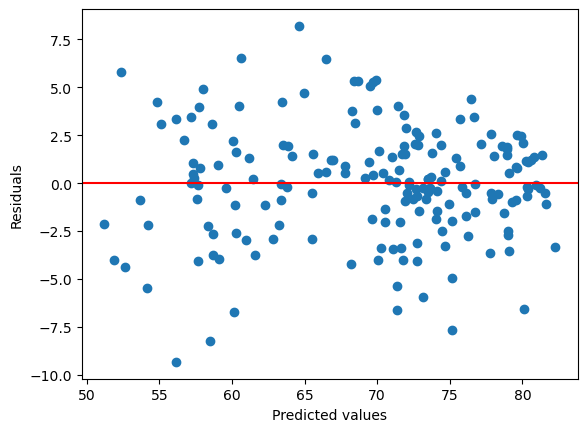

In [70]:
residuals = mod_aic_forward.resid

# Create the residual plot using matplotlib
fig, ax = plt.subplots()
ax.scatter(mod_aic_forward.predict(), residuals)
ax.axhline(y=0, color='r', linestyle='-')
ax.set_xlabel('Predicted values')
ax.set_ylabel('Residuals')
plt.show()

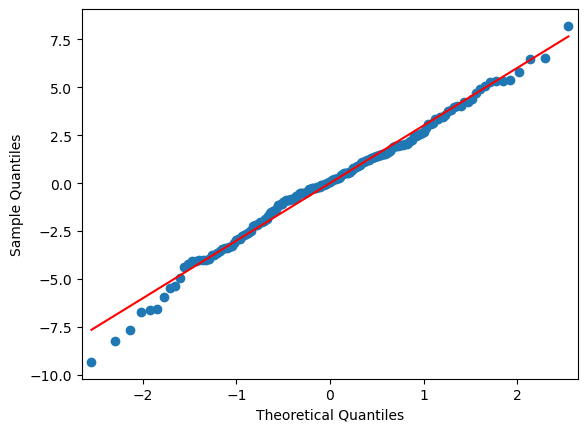

In [71]:
import statsmodels

fig, ax = plt.subplots()
statsmodels.graphics.gofplots.qqplot(residuals, ax=ax, line='r')
plt.show()

According to google this parabolic residual plot can indicate the need for a quadratic term in the model. At least the qq plot is quite good.

# EHW robust standard errors and confidence intervals

In [72]:
#find the Eicker Huber White robust standard errors
from statsmodels.stats import sandwich_covariance
robust_cov = sandwich_covariance.cov_white_simple(mod_aic_forward)
robust_se = np.sqrt(np.diag(robust_cov))
print(robust_se)

[7.26064226 0.89261248 0.2474788  0.86368496 0.3691597  0.27597569
 0.08590526 0.03211122 0.02806266 0.15494964 0.11697974]


In [73]:
#put into series with coeffient names as index
robust_se = pd.Series(robust_se, index=mod_aic_forward.params.index)
#put into dataframe with coefficient_name and error_estimate
ehw_errors = pd.DataFrame()
ehw_errors['coefficient'] = mod_aic_forward.params.index
ehw_errors['ehw_robust_se'] = robust_se.values

display(ehw_errors)

,coefficient,ehw_robust_se
0,const,7.260642
1,region_Africa,0.892612
2,log_une_hiv,0.247479
3,region_Eastern Mediterranean,0.863685
4,log_une_gni,0.369160
5,bmi,0.275976
6,age5-19thinness,0.085905
7,basic_water,0.032111
8,diphtheria,0.028063
9,gghe-d,0.154950


In [74]:
#construct the confidence intervals using the robust standard errors
conf_int = pd.DataFrame()
conf_int['lower'] = mod_aic_forward.params - 1.96*robust_se
conf_int['upper'] = mod_aic_forward.params + 1.96*robust_se
conf_int['coef'] = mod_aic_forward.params
conf_int['feature'] = mod_aic_forward.params.index
conf_int = conf_int.sort_values(by='coef', ascending=False)


In [75]:
#compare ehw robust standard errors to the standard errors from the model


#put into dataframe with coefficient_name and error_estimate
model_errors = pd.DataFrame()
model_errors['coefficient'] = mod_aic_forward.params.index
model_errors['forward_selection_se'] = mod_aic_forward.bse.values



In [76]:
#join model_errors and ehw_errors
error_estimates = model_errors.merge(ehw_errors, on='coefficient')
#add 2 columns for the 2 confidence intervalse
error_estimates['lower'] = mod_aic_forward.params.values - 1.96*error_estimates['forward_selection_se']
error_estimates['upper'] = mod_aic_forward.params.values + 1.96*error_estimates['forward_selection_se']



#add robust confidence intervals
error_estimates['ehw_lower'] = mod_aic_forward.params.values - 1.96*error_estimates['ehw_robust_se']
error_estimates['ehw_upper'] = mod_aic_forward.params.values + 1.96*error_estimates['ehw_robust_se']


#reorder columns
error_estimates = error_estimates[['coefficient', 'forward_selection_se', 'lower', 'upper', 'ehw_robust_se', 'ehw_lower', 'ehw_upper']]

display(error_estimates)

,coefficient,forward_selection_se,lower,upper,ehw_robust_se,ehw_lower,ehw_upper
0,const,6.230970,43.511757,67.937158,7.260642,41.493599,69.955316
1,region_Africa,0.831493,-5.129795,-1.870341,0.892612,-5.249588,-1.750548
2,log_une_hiv,0.216830,-1.729210,-0.879235,0.247479,-1.789281,-0.819164
3,region_Eastern Mediterranean,0.920405,-4.392102,-0.784112,0.863685,-4.280930,-0.895285
4,log_une_gni,0.374320,0.972976,2.440310,0.369160,0.983090,2.430196
5,bmi,0.230559,-1.269495,-0.365705,0.275976,-1.358512,-0.276688
6,age5-19thinness,0.081432,-0.393164,-0.073950,0.085905,-0.401931,-0.065183
7,basic_water,0.028773,0.059180,0.171971,0.032111,0.052638,0.178514
8,diphtheria,0.020195,0.049009,0.128174,0.028063,0.033589,0.143595
9,gghe-d,0.155256,0.030659,0.639262,0.154950,0.031259,0.638662


In [77]:
fav_model_features = ['bmi', 'basic_water', 'region_Eastern Mediterranean', 'age5-19obesity', 'gghe-d', 'log_une_gni', 'region_Africa', 'log_une_hiv', 'age5-19thinness', 'diphtheria']
fav_model_X = X[fav_model_features]

In [78]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = pd.DataFrame(poly.fit_transform(fav_model_X))

In [79]:
polymod = forward_selection_aic(X_poly,y)

In [80]:
polymod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            life_expect   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     104.4
Date:                Tue, 09 May 2023   Prob (F-statistic):           6.07e-80
Time:                        15:49:11   Log-Likelihood:                -421.39
No. Observations:                 183   AIC:                             880.8
Df Residuals:                     164   BIC:                             941.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         68.2264      5.107     13.360      0.000      58.143      78.310
0             -0.8148      0.244     -3.342      0.001      -1.296      -0.333
2             -4.8495      1.810     -2.679      0.008      -8.424      -1.275
4              0.4960      0.197      2.517      0.013       0.107       0.885
13             0.0566      0.020      2.818      0.005       0.017       0.096
22             0.0006      0.005      0.126      0.900      -0.009       0.011
24             0.0081      0.003      2.791      0.006       0.002       0.014
29            -4.8495      1.810     -2.679      0.008      -8.424      -1.275
36             0.0984      0.042      2.346      0.020       0.016       0.181
37            -0.0587      0.013     -4.368      0.000      -0.085      -0.032
39             0.0754      0.049      1.526      0.129      -0.022       0.173
42            -0.0717      0.020     -3.525      0.001      -0.112      -0.032
43            -0.0106      0.004     -2.910      0.004      -0.018      -0.003
46             0.9263      0.506      1.831      0.069      -0.073       1.925
47            -0.0376      0.083     -0.452      0.652      -0.202       0.127
54             0.0155      0.003      4.932      0.000       0.009       0.022
56            -1.2400      0.496     -2.500      0.013      -2.219      -0.261
57            -0.5557      0.132     -4.216      0.000      -0.816      -0.295
59            -0.1973      0.125     -1.575      0.117      -0.445       0.050
60            -0.1192      0.036     -3.347      0.001      -0.190      -0.049
==============================================================================
Omnibus:                        5.654   Durbin-Watson:                   2.210
Prob(Omnibus):                  0.059   Jarque-Bera (JB):                5.989
Skew:                          -0.275   Prob(JB):                       0.0501
Kurtosis:                       3.694   Cond. No.                     4.25e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.15e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

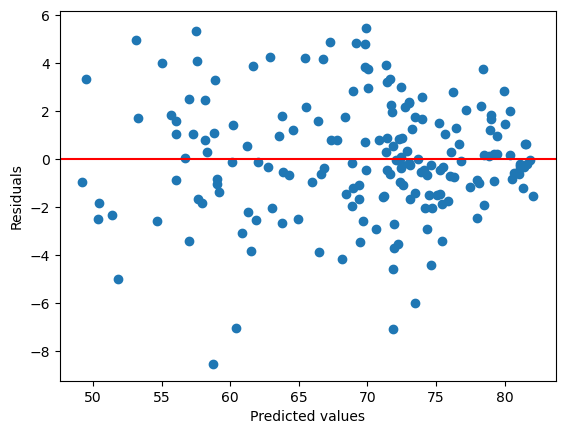

In [81]:
residuals = polymod.resid

# Create the residual plot using matplotlib
fig, ax = plt.subplots()
ax.scatter(polymod.predict(), residuals)
ax.axhline(y=0, color='r', linestyle='-')
ax.set_xlabel('Predicted values')
ax.set_ylabel('Residuals')
plt.show()

I've tried a lot of things (not shown). It doesn't seem adding any combination of interaction or squared terms fixes the residuals significantly (at least for any model that is not terribly overfitted).

### Let's try some other diagnostics next

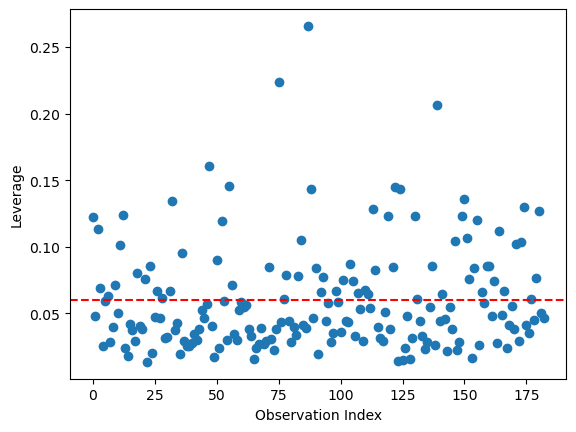

In [82]:
leverage = mod_aic_forward.get_influence().hat_matrix_diag

# Plot the leverage values
plt.plot(np.arange(len(leverage)), leverage, 'o')
plt.axhline(y=np.mean(leverage), color='r', linestyle='--')
plt.xlabel('Observation Index')
plt.ylabel('Leverage')
plt.show()

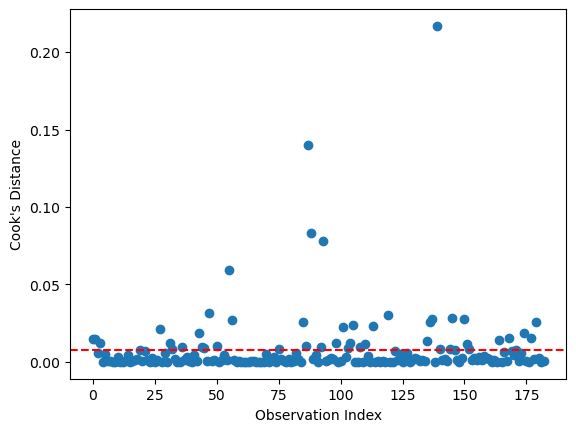

In [83]:
influence = mod_aic_forward.get_influence()
cd, _ = influence.cooks_distance

# Plot the Cook's distance values
plt.plot(np.arange(len(cd)), cd, 'o')
plt.axhline(y=np.mean(cd), color='r', linestyle='--')
plt.xlabel('Observation Index')
plt.ylabel("Cook's Distance")
plt.show()

In [84]:
np.where(cd > 0.05)

(array([ 55,  87,  88,  93, 139], dtype=int64),)

In [85]:
best_observations.iloc[[55,87,88,93,139]]

,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,bmi,age5-19thinness,age5-19obesity,...,une_literacy,une_school,diseases,region_Africa,region_Americas,region_Eastern Mediterranean,region_Europe,region_South-East Asia,region_Western Pacific,country
221,2000,48.63049,15.34542,539.93450,0.082225,0.011565,6.80285,25.5,9.9,1.0,...,81.66070,NaN,87.666667,1,0,0,0,0,0,Eswatini
3073,2013,65.99978,16.78192,202.99580,0.045770,0.003320,0.74510,29.8,0.1,20.4,...,NaN,NaN,92.333333,0,0,0,0,0,1,Kiribati
1655,2006,73.52585,17.21701,87.16492,0.011810,0.000445,0.01498,28.7,3.1,19.9,...,93.28212,6.19119,99.000000,0,0,1,0,0,0,Kuwait
581,2003,46.81549,14.34517,607.87410,0.090445,0.008945,1.97190,24.2,10.6,1.1,...,86.25443,5.82818,88.333333,1,0,0,0,0,0,Lesotho
2898,2008,72.82797,18.46681,139.05050,0.015520,0.000740,3.97080,31.3,0.2,13.9,...,98.97326,11.83690,50.666667,0,0,0,0,0,1,Samoa


In [86]:
fav_model_X_COOKS = fav_model_X.drop([55,87,88,93,139], axis=0)
y_COOKS = y.drop([55,87,88,93,139], axis=0)

In [87]:
final_mod = sm.OLS(y_COOKS, sm.add_constant(fav_model_X_COOKS)).fit()

In [88]:
final_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            life_expect   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     143.9
Date:                Tue, 09 May 2023   Prob (F-statistic):           1.22e-76
Time:                        15:49:12   Log-Likelihood:                -428.36
No. Observations:                 178   AIC:                             878.7
Df Residuals:                     167   BIC:                             913.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           50.0564      5.971      8.384      0.000      38.269      61.844
bmi                             -0.6789      0.226     -3.006      0.003      -1.125      -0.233
basic_water                      0.0723      0.028      2.586      0.011       0.017       0.128
region_Eastern Mediterranean    -2.5787      0.853     -3.024      0.003      -4.262      -0.895
age5-19obesity                   0.4205      0.099      4.241      0.000       0.225       0.616
gghe-d                           0.4388      0.149      2.942      0.004       0.144       0.733
log_une_gni                      1.8810      0.357      5.274      0.000       1.177       2.585
region_Africa                   -3.4454      0.766     -4.498      0.000      -4.958      -1.933
log_une_hiv                     -1.2026      0.204     -5.894      0.000      -1.605      -0.800
age5-19thinness                 -0.1471      0.078     -1.890      0.060      -0.301       0.007
diphtheria                       0.1277      0.020      6.424      0.000       0.088       0.167
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                3.197
Skew:                          -0.280   Prob(JB):                        0.202
Kurtosis:                       3.343   Cond. No.                     3.64e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

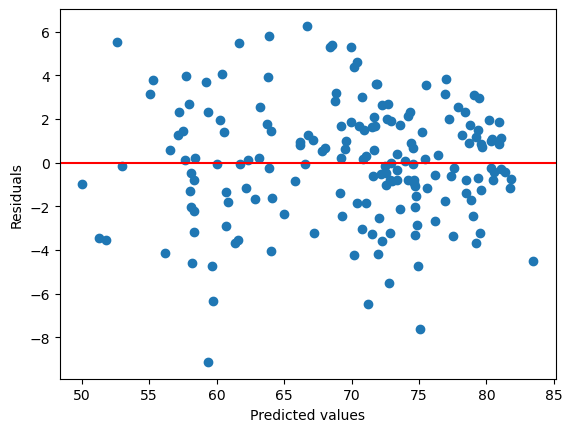

In [89]:
residuals = final_mod.resid

# Create the residual plot using matplotlib
fig, ax = plt.subplots()
ax.scatter(final_mod.predict(), residuals)
ax.axhline(y=0, color='r', linestyle='-')
ax.set_xlabel('Predicted values')
ax.set_ylabel('Residuals')
plt.show()

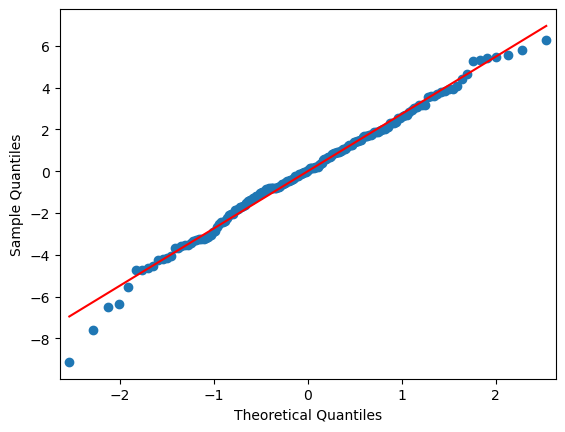

In [90]:
fig, ax = plt.subplots()
statsmodels.graphics.gofplots.qqplot(residuals, ax=ax, line='r')
plt.show()

### Residuals looks roughly the same, but the coefficients did change a bit. Perhaps it is more accurate?

# Taking break from this to try the other datasets (Spoiler: it doesnt make much of a difference)

In [91]:
X = obs_full_obs.drop(columns = ['year','country'])
y = obs_full_obs['life_expect']

#Also drop the closely related features like infant mortality, etc
X = X.drop(columns=highly_correlated_features)
X = X.drop(columns= ['life_expect'])
X = X.drop(columns= ['life_exp60'])
X = X.drop(columns=['une_gni', 'une_pop', 'age1-4mort'])
X = X.drop(columns=['log_infant_mort','log_age1-4mort'])

In [92]:
mod_aic_backward= backward_selection_aic(X,y)
mod_aic_forward= forward_selection_aic(X,y)

In [93]:
mod_aic_backward.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            life_expect   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     71.98
Date:                Tue, 09 May 2023   Prob (F-statistic):           2.33e-56
Time:                        15:49:15   Log-Likelihood:                -428.44
No. Observations:                 165   AIC:                             882.9
Df Residuals:                     152   BIC:                             923.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              79.0951      6.263     12.629      0.000      66.721      91.469
diphtheria          0.0270      0.078      0.346      0.730      -0.127       0.181
age5-19obesity      0.4818      0.106      4.534      0.000       0.272       0.692
diseases            0.0154      0.008      2.017      0.045       0.000       0.031
measles            -0.0368      0.052     -0.703      0.483      -0.140       0.067
doctors             0.0825      0.035      2.342      0.020       0.013       0.152
gghe-d              0.8654      0.254      3.407      0.001       0.364       1.367
hepatitis           0.0214      0.014      1.534      0.127      -0.006       0.049
bmi                -1.3209      0.256     -5.170      0.000      -1.826      -0.816
polio               0.0561      0.078      0.721      0.472      -0.098       0.210
age5-19thinness    -0.2697      0.092     -2.938      0.004      -0.451      -0.088
basic_water         0.1759      0.029      6.077      0.000       0.119       0.233
region_Africa      -5.5507      0.887     -6.260      0.000      -7.303      -3.799
che_gdp            -0.3440      0.166     -2.075      0.040      -0.672      -0.017
==============================================================================
Omnibus:                        3.429   Durbin-Watson:                   2.206
Prob(Omnibus):                  0.180   Jarque-Bera (JB):                2.950
Skew:                          -0.288   Prob(JB):                        0.229
Kurtosis:                       3.312   Cond. No.                     1.73e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.54e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [94]:
mod_aic_forward.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            life_expect   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     79.49
Date:                Tue, 09 May 2023   Prob (F-statistic):           1.77e-57
Time:                        15:49:15   Log-Likelihood:                -428.05
No. Observations:                 165   AIC:                             880.1
Df Residuals:                     153   BIC:                             917.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              78.4732      6.239     12.578      0.000      66.148      90.798
region_Africa      -5.5363      0.869     -6.368      0.000      -7.254      -3.819
che_gdp            -0.3346      0.164     -2.041      0.043      -0.658      -0.011
hepatitis           0.0220      0.014      1.611      0.109      -0.005       0.049
bmi                -1.2999      0.254     -5.112      0.000      -1.802      -0.798
polio               0.0630      0.030      2.075      0.040       0.003       0.123
region_Europe      -1.1433      1.073     -1.066      0.288      -3.263       0.976
age5-19thinness    -0.2775      0.091     -3.033      0.003      -0.458      -0.097
doctors             0.1105      0.044      2.494      0.014       0.023       0.198
basic_water         0.1764      0.029      6.175      0.000       0.120       0.233
gghe-d              0.9013      0.254      3.550      0.001       0.400       1.403
age5-19obesity      0.4283      0.119      3.594      0.000       0.193       0.664
==============================================================================
Omnibus:                        3.268   Durbin-Watson:                   2.205
Prob(Omnibus):                  0.195   Jarque-Bera (JB):                2.827
Skew:                          -0.301   Prob(JB):                        0.243
Kurtosis:                       3.220   Cond. No.                     3.59e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

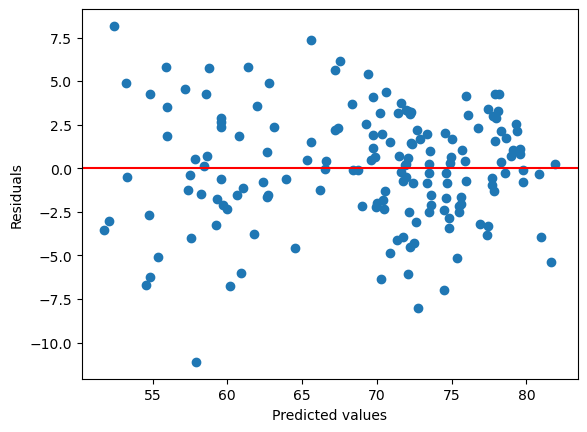

In [95]:
residuals = mod_aic_forward.resid

# Create the residual plot using matplotlib
fig, ax = plt.subplots()
ax.scatter(mod_aic_forward.predict(), residuals)
ax.axhline(y=0, color='r', linestyle='-')
ax.set_xlabel('Predicted values')
ax.set_ylabel('Residuals')
plt.show()

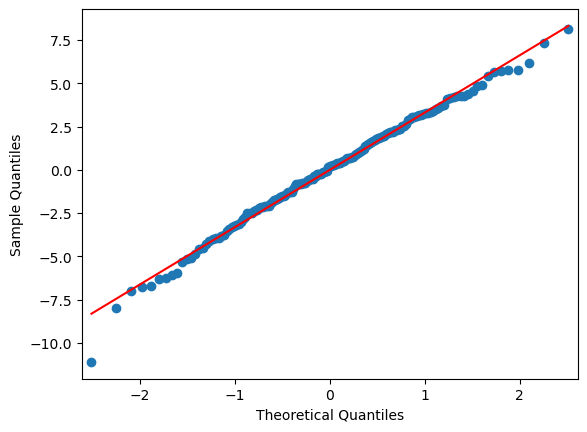

In [96]:
fig, ax = plt.subplots()
statsmodels.graphics.gofplots.qqplot(residuals, ax=ax, line='r')
plt.show()

In [97]:
X = obs_full_features.drop(columns = ['year','country'])
y = obs_full_features['life_expect']

#Also drop the closely related features like infant mortality, etc
X = X.drop(columns=highly_correlated_features)
X = X.drop(columns= ['life_expect'])
X = X.drop(columns= ['life_exp60'])
X = X.drop(columns=['une_poverty', 'une_gni', 'une_hiv', 'une_pop', 'age1-4mort'])
X = X.drop(columns=['log_infant_mort','log_age1-4mort'])

In [98]:
mod_aic_backward= backward_selection_aic(X,y)
mod_aic_forward= forward_selection_aic(X,y)

In [99]:
mod_aic_backward.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            life_expect   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     36.44
Date:                Tue, 09 May 2023   Prob (F-statistic):           3.96e-20
Time:                        15:49:19   Log-Likelihood:                -132.12
No. Observations:                  61   AIC:                             298.2
Df Residuals:                      44   BIC:                             334.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           68.4724     11.803      5.801      0.000      44.684      92.261
log_une_hiv                     -1.3798      0.469     -2.940      0.005      -2.326      -0.434
region_Eastern Mediterranean    12.6172      3.028      4.167      0.000       6.515      18.719
une_literacy                     0.0857      0.029      2.957      0.005       0.027       0.144
diphtheria                      -0.0130      0.155     -0.083      0.934      -0.326       0.300
age5-19obesity                   0.7652      0.237      3.228      0.002       0.287       1.243
diseases                         0.0319      0.009      3.367      0.002       0.013       0.051
measles                          0.1144      0.081      1.420      0.163      -0.048       0.277
region_South-East Asia           9.2756      1.923      4.823      0.000       5.399      13.152
region_Western Pacific           8.2497      2.331      3.539      0.001       3.552      12.948
bmi                             -1.9990      0.538     -3.717      0.001      -3.083      -0.915
hospitals                       -0.8866      0.315     -2.814      0.007      -1.522      -0.252
log_une_gni                      2.0100      0.782      2.570      0.014       0.434       3.586
polio                           -0.0058      0.144     -0.040      0.968      -0.296       0.284
region_Europe                   13.7833      2.538      5.432      0.000       8.669      18.897
basic_water                      0.0705      0.047      1.487      0.144      -0.025       0.166
log_une_pop                     -0.7139      0.305     -2.341      0.024      -1.328      -0.099
region_Africa                    9.3947      2.103      4.467      0.000       5.156      13.633
region_Americas                 15.1519      2.322      6.527      0.000      10.473      19.831
==============================================================================
Omnibus:                        2.128   Durbin-Watson:                   2.548
Prob(Omnibus):                  0.345   Jarque-Bera (JB):                1.337
Skew:                          -0.290   Prob(JB):                        0.512
Kurtosis:                       3.436   Cond. No.                     3.26e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.59e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [100]:
mod_aic_forward.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            life_expect   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     46.95
Date:                Tue, 09 May 2023   Prob (F-statistic):           1.96e-22
Time:                        15:49:19   Log-Likelihood:                -132.69
No. Observations:                  61   AIC:                             293.4
Df Residuals:                      47   BIC:                             322.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           85.4190     13.012      6.564      0.000      59.241     111.597
region_Africa                   -5.2134      1.895     -2.751      0.008      -9.026      -1.400
log_une_hiv                     -1.2486      0.423     -2.953      0.005      -2.099      -0.398
region_South-East Asia          -4.9321      1.862     -2.649      0.011      -8.678      -1.186
region_Western Pacific          -5.6993      1.746     -3.264      0.002      -9.212      -2.186
measles                          0.1271      0.030      4.305      0.000       0.068       0.187
region_Eastern Mediterranean    -1.8611      1.561     -1.193      0.239      -5.001       1.278
log_une_gni                      1.7760      0.720      2.466      0.017       0.327       3.225
hospitals                       -0.9433      0.297     -3.176      0.003      -1.541      -0.346
une_literacy                     0.0807      0.028      2.913      0.005       0.025       0.137
bmi                             -2.0107      0.521     -3.862      0.000      -3.058      -0.963
basic_water                      0.0722      0.045      1.617      0.113      -0.018       0.162
log_une_pop                     -0.7479      0.291     -2.566      0.014      -1.334      -0.161
age5-19obesity                   0.8798      0.196      4.497      0.000       0.486       1.273
==============================================================================
Omnibus:                        1.752   Durbin-Watson:                   2.549
Prob(Omnibus):                  0.416   Jarque-Bera (JB):                1.075
Skew:                          -0.289   Prob(JB):                        0.584
Kurtosis:                       3.298   Cond. No.                     6.23e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

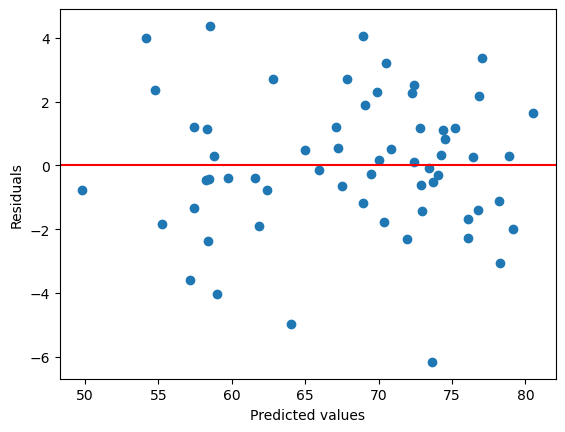

In [101]:
residuals = mod_aic_forward.resid

# Create the residual plot using matplotlib
fig, ax = plt.subplots()
ax.scatter(mod_aic_forward.predict(), residuals)
ax.axhline(y=0, color='r', linestyle='-')
ax.set_xlabel('Predicted values')
ax.set_ylabel('Residuals')
plt.show()

# Turns out the non-imputed dataset performs very similarly.